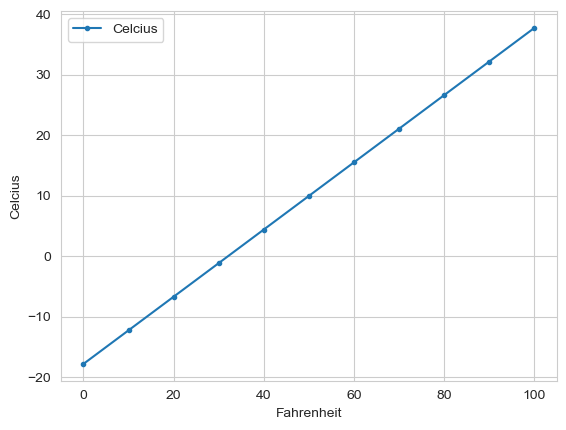

In [2]:
#Creating a line graph converting fahrenheit temps to celcius
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range (0, 101, 10)]

import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celcius'])

axes = temps_df.plot(x='Fahrenheit', y='Celcius', style='.-')

y_label = axes.set_ylabel('Celcius')

In [3]:
 cd C:\Users\chris\Documents\44-608Fundamentals\IntroToPython\examples\ch10

C:\Users\chris\Documents\44-608Fundamentals\IntroToPython\examples\ch10


In [4]:
#downloading the New York Temps
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [5]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [20]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

print(nyc.head(3))
print(nyc.tail(3))

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
     Date  Temperature  Anomaly
121  2016         40.8      3.4
122  2017         42.8      5.4
123  2018         38.7      1.3


In [8]:
nyc.Date.dtype

dtype('int64')

In [9]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [10]:
#Getting the descriptive stats for the average temps
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [11]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [12]:
#Finding the slope fo the regression line
linear_regression.slope

0.014771361132966163

In [13]:
#Finding the y-intercept of the regression line
linear_regression.intercept

8.694993233674289

In [19]:
#Using the regression line to predict the average temp for 2021
linear_regression.slope * 2021 + linear_regression.intercept

38.54791408339891

In [15]:
#Using the regression line to predict what the average temp was in 1890
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

Chris Kollbaum


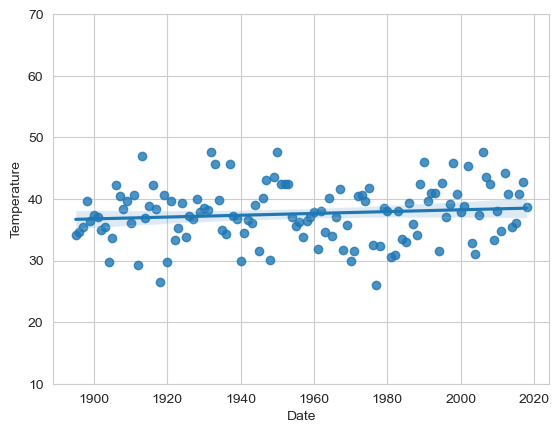

In [17]:
#Making a scatterplot of the data
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

print('Chris Kollbaum')

In [18]:
#predicting what year we will hit 40 degrees 
year = 2019

slope = linear_regression.slope

intercept = linear_regression.intercept

temperature = slope * year + intercept

while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept
    
year

2120